Introduction to Machine Learning with Python – Logistic Regression on Titanic Dataset

In [52]:
# Install seaborn if not already
!pip install seaborn --quiet

import pandas as pd
import numpy as np
from scipy import stats, integrate
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression,Ridge
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,mean_squared_error
from collections import Counter
from IPython.core.display import display, HTML
from sklearn.datasets import load_iris, load_wine
%matplotlib inline

In [ ]:
# Load Titanic dataset from seaborn
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# Drop rows with missing values in key columns
df = titanic[['survived', 'sex', 'age', 'fare', 'class']].dropna()

# Convert categorical variables
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['class'] = df['class'].map({'Third': 3, 'Second': 2, 'First': 1})

# Features and target
X = df[['sex', 'age', 'fare', 'class']]
y = df['survived']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

In [ ]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7552447552447552
Confusion Matrix:
 [[68 19]
 [16 40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.78      0.80        87
           1       0.68      0.71      0.70        56

    accuracy                           0.76       143
   macro avg       0.74      0.75      0.75       143
weighted avg       0.76      0.76      0.76       143



In [9]:
iris = load_iris()
df=pd.DataFrame(iris.data,
                columns=iris.feature_names,
              )

In [10]:
df['target']=iris.target

df.loc[df['target'] == 0, 'target'] = "setosa"
df.loc[df['target'] == 1, 'target'] = "versicolor"
df.loc[df['target'] == 2, 'target'] = "virginica"

<ipython-input-10-f702543370c2>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'setosa' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['target'] == 0, 'target'] = "setosa"


In [11]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


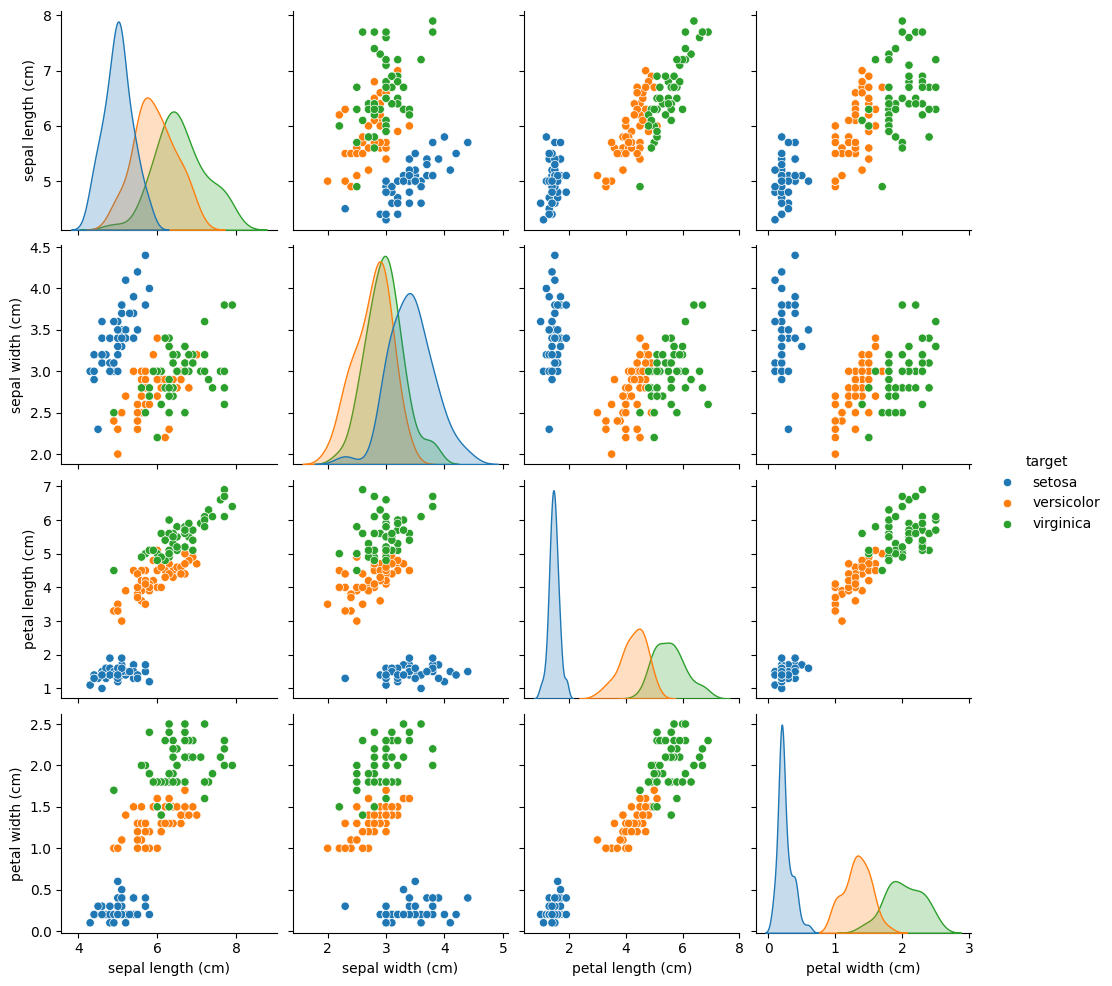

In [12]:
sns.pairplot(df,hue='target')

In [13]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [14]:
np.random.seed(42)

In [15]:
data_root = "https://github.com/ageron/data/raw/main/"
lifesat = pd.read_csv(data_root + "lifesat/lifesat.csv")
X = lifesat[["GDP per capita (USD)"]].values
y = lifesat[["Life satisfaction"]].values

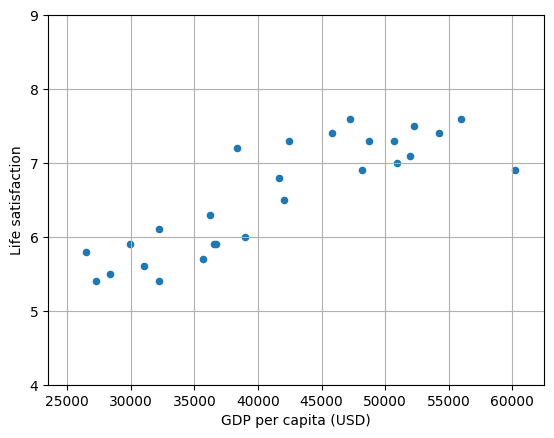

In [17]:
lifesat.plot(kind='scatter', grid=True,
             x="GDP per capita (USD)", y="Life satisfaction")
plt.axis([23_500, 62_500, 4, 9])
plt.show()

In [19]:
model=LinearRegression()
model.fit(X,y)

X_new=[[37_655.2]]
print(model.predict(X_new))

[[6.30165767]]


In [22]:
import urllib.request
from pathlib import Path

datapath=Path()/'datasets'/'lifesat'
datapath.mkdir(parents=True,exist_ok=True)

data_root = "https://github.com/ageron/data/raw/main/"
for filename in ("oecd_bli.csv", "gdp_per_capita.csv"):
    if not (datapath / filename).is_file():
        print("Downloading", filename)
        url = data_root + "lifesat/" + filename
        urllib.request.urlretrieve(url, datapath / filename)

In [24]:
oecd_bli=pd.read_csv(datapath / 'oecd_bli.csv')
gdp_per_capita=pd.read_csv(datapath / 'gdp_per_capita.csv')

In [25]:
gdp_year=2020
gdppc_col='GDP per capita (USD)'
lifesat_col='Life satisfaction'

gdp_per_capita = gdp_per_capita[gdp_per_capita["Year"] == gdp_year]
gdp_per_capita = gdp_per_capita.drop(["Code", "Year"], axis=1)
gdp_per_capita.columns = ["Country", gdppc_col]
gdp_per_capita.set_index("Country", inplace=True)

gdp_per_capita.head()

,GDP per capita (USD)
Country,
Afghanistan,1978.961579
Africa Eastern and Southern,3387.594670
Africa Western and Central,4003.158913
Albania,13295.410885
Algeria,10681.679297


In [26]:
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")

oecd_bli.head()

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,20.0,...,49126.0,95.0,NaN,85.0,2.7,502.0,14.35,91.0,93.0,21.0
Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,21.0,...,50349.0,92.0,1.6,70.0,1.3,492.0,14.55,80.0,92.0,17.0
Belgium,15.0,1.9,77.0,4.75,63.0,70.1,1.0,30364.0,386006.0,21.0,...,49675.0,91.0,2.2,74.0,2.0,503.0,15.70,89.0,84.0,19.3
Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,NaN,...,NaN,90.0,NaN,NaN,2.2,395.0,NaN,79.0,73.0,16.2
Canada,7.0,0.2,91.0,3.69,73.0,82.2,1.3,30854.0,423849.0,22.0,...,47622.0,93.0,2.6,88.0,2.9,523.0,14.56,68.0,91.0,17.3


In [27]:
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                              left_index=True, right_index=True)
full_country_stats.sort_values(by=gdppc_col, inplace=True)
full_country_stats = full_country_stats[[gdppc_col, lifesat_col]]

full_country_stats.head()

,GDP per capita (USD),Life satisfaction
Country,,
South Africa,11466.189672,4.7
Colombia,13441.492952,6.3
Brazil,14063.982505,6.4
Mexico,17887.750736,6.5
Chile,23324.524751,6.5


In [28]:
min_gdp = 23_500
max_gdp = 62_500

country_stats = full_country_stats[(full_country_stats[gdppc_col] >= min_gdp) &
                                   (full_country_stats[gdppc_col] <= max_gdp)]
country_stats.head()

,GDP per capita (USD),Life satisfaction
Country,,
Russia,26456.387938,5.8
Greece,27287.083401,5.4
Turkey,28384.987785,5.5
Latvia,29932.493910,5.9
Hungary,31007.768407,5.6


In [29]:
country_stats.to_csv(datapath / "lifesat.csv")
full_country_stats.to_csv(datapath / "lifesat_full.csv")

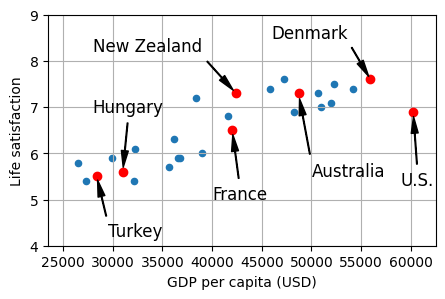

In [31]:
country_stats.plot(kind='scatter', figsize=(5, 3), grid=True,
                   x=gdppc_col, y=lifesat_col)

min_life_sat = 4
max_life_sat = 9

position_text = {
    "Turkey": (29_500, 4.2),
    "Hungary": (28_000, 6.9),
    "France": (40_000, 5),
    "New Zealand": (28_000, 8.2),
    "Australia": (50_000, 5.5),
    "United States": (59_000, 5.3),
    "Denmark": (46_000, 8.5)
}

for country, pos_text in position_text.items():
    pos_data_x = country_stats[gdppc_col].loc[country]
    pos_data_y = country_stats[lifesat_col].loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y),
                 xytext=pos_text, fontsize=12,
                 arrowprops=dict(facecolor='black', width=0.5,
                                 shrink=0.08, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])

# save_fig('money_happy_scatterplot')
plt.show()

In [32]:
highlighted_countiries=country_stats.loc[list(position_text.keys())]
highlighted_countiries[[gdppc_col,lifesat_col]].sort_values(by=gdppc_col)

,GDP per capita (USD),Life satisfaction
Country,,
Turkey,28384.987785,5.5
Hungary,31007.768407,5.6
France,42025.617373,6.5
New Zealand,42404.393738,7.3
Australia,48697.837028,7.3
Denmark,55938.212809,7.6
United States,60235.728492,6.9


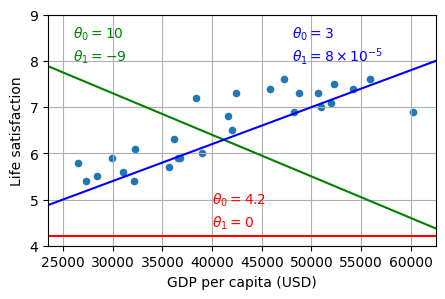

In [37]:
country_stats.plot(kind='scatter',
                   figsize=(5,3),
                   grid=True,
                   x=gdppc_col,
                   y=lifesat_col)

X=np.linspace(min_gdp,max_gdp,1000)
w1,w2=4.2,0
plt.plot(X,w1+w2*1e-5*X, 'r')
plt.text(40_000,4.9,fr"$\theta_0 = {w1}$",color='r')
plt.text(40_000,4.4,fr"$\theta_1 = {w2}$",color='r')

w1,w2=10,-9
plt.plot(X,w1+w2*1e-5*X,'g')
plt.text(26_000,8.5,fr"$\theta_0 = {w1}$",color='g')
plt.text(26_000,8.0,fr"$\theta_1 = {w2}$",color='g')

w1, w2 = 3, 8
plt.plot(X, w1 + w2 * 1e-5 * X, "b")
plt.text(48_000, 8.5, fr"$\theta_0 = {w1}$", color="b")
plt.text(48_000, 8.0, fr"$\theta_1 = {w2} \times 10^{{-5}}$", color="b")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])

# save_fig('tweaking_model_params_plot')
plt.show()


In [42]:
X_sample=country_stats[[gdppc_col]].values
y_sample=country_stats[[lifesat_col]].values

lin1=LinearRegression()
lin1.fit(X_sample,y_sample)

t0,t1=lin1.intercept_[0],lin1.coef_.ravel()[0]
print(f"{t0:.2f}, {t1:.2e}")

3.75, 6.78e-05


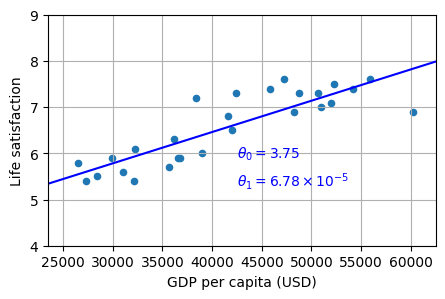

In [44]:
country_stats.plot(kind='scatter',
                   figsize=(5,3),
                   grid=True,
                   x=gdppc_col,
                   y=lifesat_col)

X=np.linspace(min_gdp,max_gdp,1000)
plt.plot(X, t0 + t1 * X, "b")

plt.text(max_gdp - 20_000, min_life_sat + 1.9,
         fr"$\theta_0 = {t0:.2f}$", color="b")
plt.text(max_gdp - 20_000, min_life_sat + 1.3,
         fr"$\theta_1 = {t1 * 1e5:.2f} \times 10^{{-5}}$", color="b")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])

# save_fig('best_fit_model_plot')
plt.show()

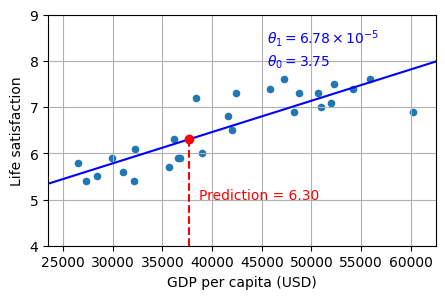

In [45]:
cyprus_gdp_per_capita = gdp_per_capita[gdppc_col].loc["Cyprus"]
cyprus_predicted_life_satisfaction = lin1.predict([[cyprus_gdp_per_capita]])[0, 0]
cyprus_predicted_life_satisfaction

country_stats.plot(kind='scatter', figsize=(5, 3), grid=True,
                   x=gdppc_col, y=lifesat_col)

X = np.linspace(min_gdp, max_gdp, 1000)
plt.plot(X, t0 + t1 * X, "b")

plt.text(min_gdp + 22_000, max_life_sat - 1.1,
         fr"$\theta_0 = {t0:.2f}$", color="b")
plt.text(min_gdp + 22_000, max_life_sat - 0.6,
         fr"$\theta_1 = {t1 * 1e5:.2f} \times 10^{{-5}}$", color="b")

plt.plot([cyprus_gdp_per_capita, cyprus_gdp_per_capita],
         [min_life_sat, cyprus_predicted_life_satisfaction], "r--")
plt.text(cyprus_gdp_per_capita + 1000, 5.0,
         fr"Prediction = {cyprus_predicted_life_satisfaction:.2f}", color="r")
plt.plot(cyprus_gdp_per_capita, cyprus_predicted_life_satisfaction, "ro")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])

plt.show()

In [46]:
missing_data = full_country_stats[(full_country_stats[gdppc_col] < min_gdp) |
                                  (full_country_stats[gdppc_col] > max_gdp)]
missing_data

,GDP per capita (USD),Life satisfaction
Country,,
South Africa,11466.189672,4.7
Colombia,13441.492952,6.3
Brazil,14063.982505,6.4
Mexico,17887.750736,6.5
Chile,23324.524751,6.5
Norway,63585.903514,7.6
Switzerland,68393.306004,7.5
Ireland,89688.956958,7.0
Luxembourg,110261.157353,6.9


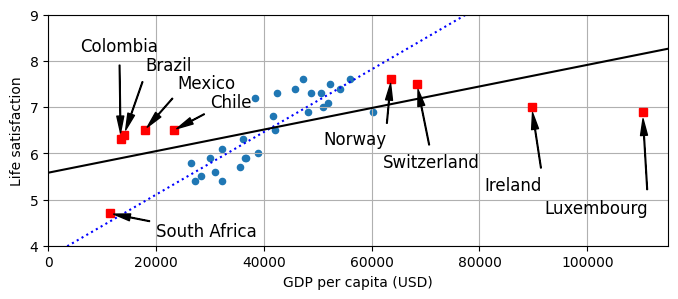

In [48]:
position_text_missing_countries = {
    "South Africa": (20_000, 4.2),
    "Colombia": (6_000, 8.2),
    "Brazil": (18_000, 7.8),
    "Mexico": (24_000, 7.4),
    "Chile": (30_000, 7.0),
    "Norway": (51_000, 6.2),
    "Switzerland": (62_000, 5.7),
    "Ireland": (81_000, 5.2),
    "Luxembourg": (92_000, 4.7),
}


full_country_stats.plot(kind='scatter', figsize=(8, 3),
                        x=gdppc_col, y=lifesat_col, grid=True)

for country, pos_text in position_text_missing_countries.items():
    pos_data_x, pos_data_y = missing_data.loc[country]
    plt.annotate(country, xy=(pos_data_x, pos_data_y),
                 xytext=pos_text, fontsize=12,
                 arrowprops=dict(facecolor='black', width=0.5,
                                 shrink=0.08, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "rs")

X = np.linspace(0, 115_000, 1000)
plt.plot(X, t0 + t1 * X, "b:")

lin_reg_full = LinearRegression()
Xfull = np.c_[full_country_stats[gdppc_col]]
yfull = np.c_[full_country_stats[lifesat_col]]
lin_reg_full.fit(Xfull, yfull)

t0full, t1full = lin_reg_full.intercept_[0], lin_reg_full.coef_.ravel()[0]
X = np.linspace(0, 115_000, 1000)
plt.plot(X, t0full + t1full * X, "k")

plt.axis([0, 115_000, min_life_sat, max_life_sat])

# save_fig('representative_training_data_scatterplot')
plt.show()

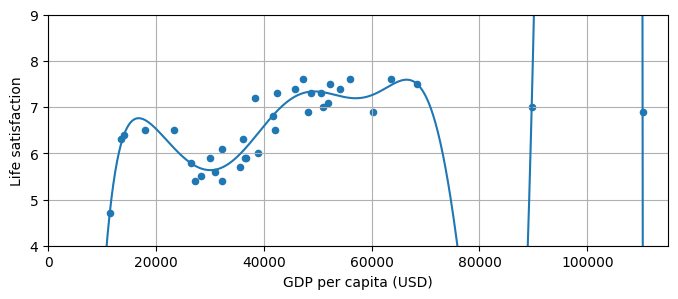

In [51]:
from sklearn import preprocessing
from sklearn import pipeline

full_country_stats.plot(kind='scatter', figsize=(8, 3),
                        x=gdppc_col, y=lifesat_col, grid=True)

poly = preprocessing.PolynomialFeatures(degree=10, include_bias=False)
scaler = preprocessing.StandardScaler()
lin_reg2 = LinearRegression()

pipeline_reg = pipeline.Pipeline([
    ('poly', poly),
    ('scal', scaler),
    ('lin', lin_reg2)])
pipeline_reg.fit(Xfull, yfull)
curve = pipeline_reg.predict(X[:, np.newaxis])
plt.plot(X, curve)

plt.axis([0, 115_000, min_life_sat, max_life_sat])

# save_fig('overfitting_model_plot')
plt.show()

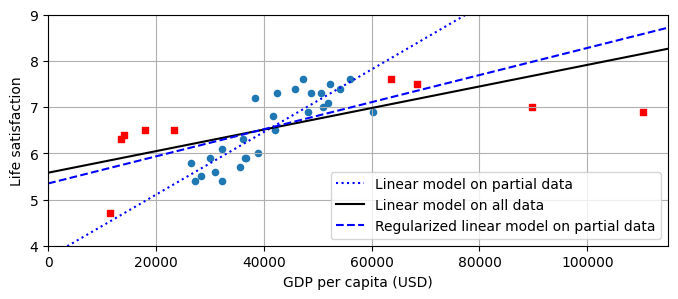

In [53]:
country_stats.plot(kind='scatter', x=gdppc_col, y=lifesat_col, figsize=(8, 3))
missing_data.plot(kind='scatter', x=gdppc_col, y=lifesat_col,
                  marker="s", color="r", grid=True, ax=plt.gca())

X = np.linspace(0, 115_000, 1000)
plt.plot(X, t0 + t1*X, "b:", label="Linear model on partial data")
plt.plot(X, t0full + t1full * X, "k-", label="Linear model on all data")

ridge = Ridge(alpha=10**9.5)
X_sample = country_stats[[gdppc_col]]
y_sample = country_stats[[lifesat_col]]
ridge.fit(X_sample, y_sample)
t0ridge, t1ridge = ridge.intercept_[0], ridge.coef_.ravel()[0]
plt.plot(X, t0ridge + t1ridge * X, "b--",
         label="Regularized linear model on partial data")
plt.legend(loc="lower right")

plt.axis([0, 115_000, min_life_sat, max_life_sat])

# save_fig('ridge_model_plot')
plt.show()